In [243]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [244]:
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 
             'by pass','extravasates', 'regeneration of', 'early uptake in', 
             'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym', 'defect in node', 
             'changes in node', 'changes in stru', 'special forms', 'dislocation of', 
             'exclusion of no', 'no. of nodes in']

In [247]:
df= pd.read_csv('lymphography.data', header=None)
df.columns = col_names
df.shape
df.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [221]:
df.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [222]:
df['class'].value_counts()

2    81
3    61
4     4
1     2
Name: class, dtype: int64

In [248]:
def show_df_info(dataframe):
    # get the data type
    print(type(dataframe))
    print("amount of entries is %s" % dataframe.size)
    print("dimensions= %i" % dataframe.ndim)
    print("shape is ", end="")
    print(dataframe.shape)
    print("axes: ", end="")
    print(dataframe.axes)
    print("data types of columns:")
    print(dataframe.dtypes)
    print("features: %s" % dataframe.columns)

In [224]:
def sliceDataFrame(df):
# remove 2 instances with class label "normal find" and 4 instances with class label "fibrosis"
    df = df[df['class']!= 1]
    df = df[df['class']!= 4]
    df['class'] = np.where(df['class']==3,1,0)
    return df.iloc[:, 1:], df['class']

In [225]:
training_instances, class_labels = sliceDataFrame(df)
show_df_info(training_instances)

<class 'pandas.core.frame.DataFrame'>
amount of entries is 2556
dimensions= 2
shape is (142, 18)
axes: [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            137, 138, 140, 141, 142, 143, 144, 145, 146, 147],
           dtype='int64', length=142), Index(['lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s',
       'by pass', 'extravasates', 'regeneration of', 'early uptake in',
       'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym',
       'defect in node', 'changes in node', 'changes in stru', 'special forms',
       'dislocation of', 'exclusion of no', 'no. of nodes in'],
      dtype='object')]
data types of columns:
lymphatics         int64
block of affere    int64
bl. of lymph. c    int64
bl. of lymph. s    int64
by pass            int64
extravasates       int64
regeneration of    int64
early uptake in    int64
lym.nodes dimin    int64
lym.nodes enlar    int64
changes in lym     int64
defect in node     int64
changes in no

In [227]:
training_instances.head()

,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [228]:
#print(training_instances.head(5))
print()
print(class_labels.head(5))



0    1
1    0
2    1
3    1
4    0
Name: class, dtype: int64


In [229]:
from sklearn import tree, pipeline, preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [230]:
#Classification and Regression Trees (CART)

In [231]:
cart_model = tree.DecisionTreeClassifier()
logit = LogisticRegression(solver='lbfgs')
pipe1 = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(chi2, k=8)),
    ("scale", preprocessing.StandardScaler()),  
    ("CART", cart_model)])

In [232]:
pipe1.fit(training_instances, y=class_labels)

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectKBest(k=8, score_func=<function chi2 at 0x1a245a8ea0>)),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('CART',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [233]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(pipe1, training_instances, class_labels, cv=5)

In [234]:
meanCvAccuracy_cart = scores1.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy_cart)

Mean CV accuracy= 0.810000


In [235]:
pipe2 = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(chi2, k=8)),
    ("scale", preprocessing.StandardScaler()),  
    ("Logit", logit)])


In [236]:
pipe2.fit(training_instances, y=class_labels)

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectKBest(k=8, score_func=<function chi2 at 0x1a245a8ea0>)),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Logit',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [237]:
scores2 = cross_val_score(pipe2, training_instances, class_labels, cv=5)

In [238]:
meanCvAccuracy_logit = scores2.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy_logit)

Mean CV accuracy= 0.837143


In [239]:
from sklearn.externals import joblib
PIPELINEPATH= "ser_pipeline.pickle"
DATASETPATH= "lymphography.data"
joblib.dump(pipe1, PIPELINEPATH, compress = 1)

['ser_pipeline.pickle']

In [240]:
pipeline_loaded = joblib.load(PIPELINEPATH)

In [241]:
import numpy as np
vector= np.random.randint(0, 8, size=18)
print(vector)
result= pipeline_loaded.predict([vector,])
print("class label is %i" % result)

print("--- end of execution ---")


[7 0 4 2 3 6 3 4 4 2 1 1 3 0 5 2 4 5]
class label is 1
--- end of execution ---


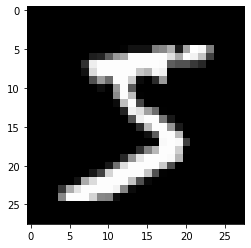

Epoch 1/4
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2604 - acc: 0.9232
Epoch 2/4
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1051 - acc: 0.9669
Epoch 3/4
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0704 - acc: 0.9783
Epoch 4/4
10000/10000 [==============================] - 0s 41us/sample - loss: 0.0943 - acc: 0.9704
Accuracy:  0.9704
<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001A49C514780>>
7
Test loss: 0.09425392851890065
Test accuracy: 0.9704


In [2]:
import tensorflow as tf
import numpy as np
import warnings
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()
# http://yann.lecun.com/exdb/mnist/

plt.imshow(X_train[0])
plt.imshow(X_train[0], cmap = plt.cm.binary_r)
plt.show()

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

opt = tf.keras.optimizers.Adam(lr=0.001, epsilon=None)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model.evaluate(X_test, y_test)

print('Accuracy: ', val_acc)
print(model.summary)
model.save('mnist_predictor.model1')
new_model = tf.keras.models.load_model('mnist_predictor.model1')
predictions = new_model.predict(X_test)
print(np.argmax(predictions[0]))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [3]:
#convolutional neural net
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf
import keras
import numpy as np
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# http://yann.lecun.com/exdb/mnist/
import matplotlib.pyplot as plt
# plt.imshow(X_train[0])
# plt.imshow(X_train[0], cmap=plt.cm.binary_r)
# plt.show()
x_train = keras.utils.normalize(X_train, axis=1)
x_test = keras.utils.normalize(X_test, axis=1)

# reshape the data to 4D tensor - (samples, x_size, y_size, num of channels) In this case - 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                activation='relu',
                input_shape=[28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.01),
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 44s 726us/step - loss: 0.9564 - acc: 0.7052
Epoch 2/5
60000/60000 [==============================] - 47s 783us/step - loss: 0.2049 - acc: 0.9373
Epoch 3/5
60000/60000 [==============================] - 49s 812us/step - loss: 0.1407 - acc: 0.9570
Epoch 4/5
60000/60000 [==============================] - 45s 744us/step - loss: 0.1135 - acc: 0.9653
Epoch 5/5
60000/60000 [==============================] - 47s 777us/step - loss: 0.0974 - acc: 0.9695
Test loss: 0.07933781251069158
Test accuracy: 0.9749
